# Module 4 – Training Linear Models

In this module we will look at the ___linear regression model___, and discuss two ways to train it:

 1. Using the ___Normal Equation___
 2. Using ___Gradient Descent (GD)___

There are three variants of the Gradient Descent that we will discuss:

 1. ___Batch GD___
 2. ___Stochastic GD___
 3. ___Mini-Batch GD___

Next, we will look at ___polynomial regression___, which can fit nonlinear datasets.  

Since polynomial regression models have more parameters than linear regression models, they are more prone to ___overfitting___ the training data.  Accordingly, we will look at how to detect whether or not this is the case using ___learning curves___, and then we will look at several ___regularization techniques___ that can reduce the risk of overfitting the training set, such as:

 1. ___Ridge Regression___
 2. ___Lasso Regression___
 3. ___Elastic Net___
 4. ___Early Stopping___

Finally, we will look at two more models that are commonly used for classification tasks: 

 1. ___Logistic Regression___
 2. ___Softmax Regression___

  

In [23]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression

In module 1, we looked at a simple regression model of life satisfaction:

$$ life\_satisfaction = \theta_0 + \theta_1 \times GDP\_per\_capita $$

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term):

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$

This can also be expressed as:

$$ \hat{y} = h_{\boldsymbol{\theta}}(\bf{x}) = \boldsymbol{\theta} \cdot \bf{x} $$

$$ \hat{y} = \boldsymbol{\theta}^T \bf{x} $$

RMSE is given by:

$$ MSE(\bf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m} \sum^m_{i=1} (\hat{y}^{(i)} - y^{(i)})^2 $$

$$ MSE(\bf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m} \sum^m_{i=1} (\boldsymbol{\theta}^T \bf{x}^{(i)} - y^{(i)})^2 $$

# Linear Regression using the Normal Equation

The ___Normal Equation___ is a closed form solution that yields the value of $ \theta $ that minimizes the cost function:

$$ \hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

Let's generate some noisy, linear data:

The [rand()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function generates random numbers between 0 and 1 from a normal distribution (that means: zero mean and standard deviation is one).  The [randn()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) function generates an array filled with random floats sampled from a univariate “normal” (i.e. Gaussian) distribution of mean 0 and variance 1.

**Important:**  Please note that some of the outputs for this notebook may be different than what is shown in Dr. Morabito's videos.  This is due to the below cell being run multiple times as he was explaining the code, which changed the random numbers that were generated.  See the [textbook's notebook](https://github.com/ageron/handson-ml2) if you wanted to verify your output.

In [24]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4+ 3*X + np.random.randn(100, 1)

Saving figure generated_data_plot


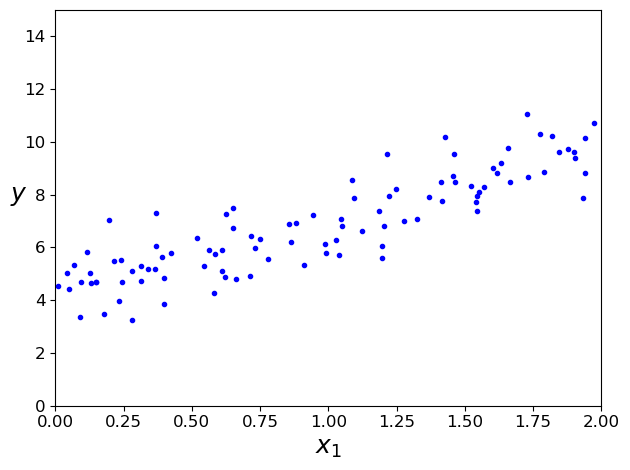

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Now that we have our data, let's use the Normal Equation to compute the optimal model parameters.

Note that the [c_()](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) function concatenates objects along their second axis, the [dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) function performs the dot prodcut between two arrays, and the [inv()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function computes the inverse of a matrix.

In [26]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [27]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [28]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


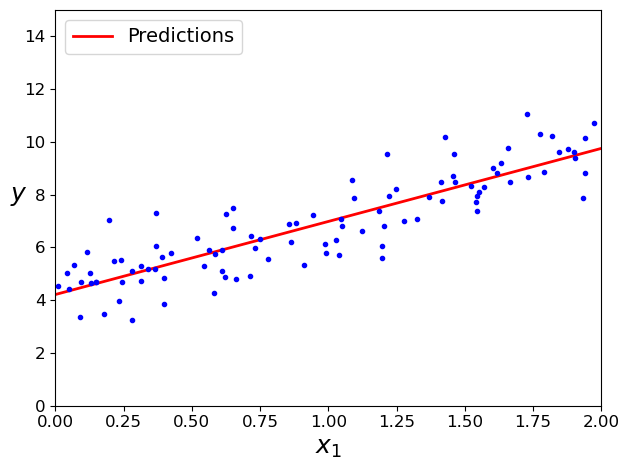

In [29]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Instead of computing the best model parameters using the Normal Equation, we can easily and simply use Scikit-Learn's [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) Class:

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [31]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the [scipy.linalg.lstsq()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html) function (the name stands for "least squares"), which you could call directly:

In [32]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# Computational Complexity and Gradient Descent

The Normal Equation computes the inverse of $ X^T X $, which is an $ (n + 1) \times (n + 1) $ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is about $ O(n^{2.4}) $ to $ O(n^3) $, depending on the implementation. That means if you double the number of features, you multiply the computation time by roughly $ 2^{2.4} = 5.3 $ to $ 2^3 = 8 $.

Scikit-Learn’s LinearRegression class employs an approach called ___Singular Value Decomposition (SVD)___ (you are __NOT__ responsible for knowing about SVD) to compute the pseudoinverse matrix, which is about $ O(n^2) $. If you double the number of features, you multiply the computation time by roughly $ 4 $.

___Gradient Descent (GD)___ is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

GD begins by selecting random initial values (this is called ___random initialization___) for the model parameters (i.e. all of the $\theta_i$ values).  Then you improve these estimates gradually at each iteration of the algorithm - each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

<img src="GD_goodLearningRate.png " width ="800" />

An important parameter in Gradient Descent is the size of the steps, determined by the ___learning rate hyperparameter___. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

<img src="GD_smallLearningRate.png " width ="800" />

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

<img src="GD_largeLearningRate.png " width ="800" />

However, not all cost functions look like nice, regular bowls!

<img src="GD_cost_function.png " width ="800" />

Fortunately, the MSE cost function for a Linear Regression model happens to be a ___convex function___, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.  In fact, the cost function for simple linear regression has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.

<img src="GD_feature_scales.png " width ="800" />

# Linear Regression using Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_j$.  

The ___partial derivative___ of the cost function with regard to parameter $\theta_j$ is given by:

<img src="PartialDerivativeMSE.png " width ="250" height=200 />

The ___gradient___ of the MSE, in the case of linear regression, is given by:

<img src="GradientMSE.png " width ="300" height=300 />

Notice that this formula involves calculations over the full training set X. This is why the algorithm is called ___Batch Gradient Descent___: it uses the whole batch of training data at every step.

Upon each iteration of the algorithm, gradient descent attempts to minimize the cost function by subtracting the gradient vector from the current estimates of the model parameters (i.e. the $\theta$'s).  This is where the ___learning rate, η,___ comes into play: multiply the gradient vector by η to determine the size of the downhill step:

<img src="ThetaNext.png " width ="200" height=150 />

Here is an implementation of the batch gradient descent algorithm:

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [12]:
theta

array([[4.21509616],
       [2.77011339]])

In [13]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


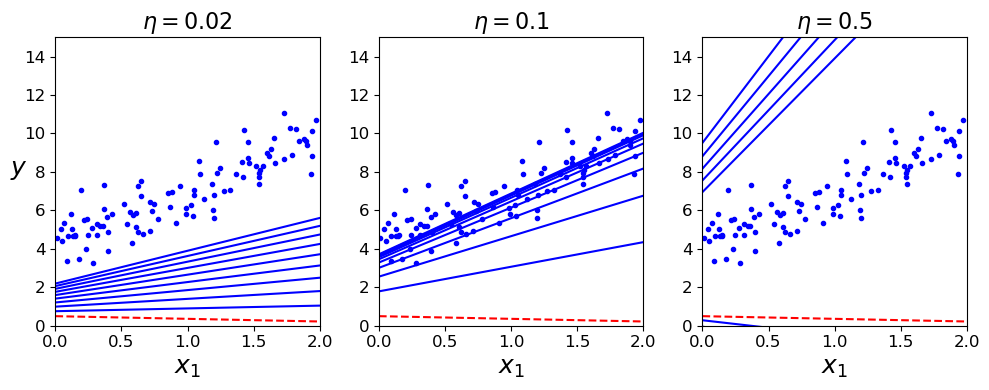

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# Stochastic Gradient Descent

Batch Gradient Descent uses the whole training set to compute the gradients at every step, which is very numerically expensive. ___Stochastic Gradient Descent___ attempts to reconcile this by picking a random instance in the training set at every step and computing the gradients based only on that single instance.

Due to the ___stochastic___ (i.e., random) nature of this algorithm, the value of the cost function will bounce up and down, decreasing only on average, instead of gently decreasing until it reaches the minimum - like batch gradient descent. Over time the best parameter values will end up very close to the optimal parameter values, but will dance around them and never settle down:

<img src="Figures/SGD_convergence.png " width ="800" />

The following code implements the stochastic gradient descent algorithm using a simple learning schedule:

Saving figure sgd_plot


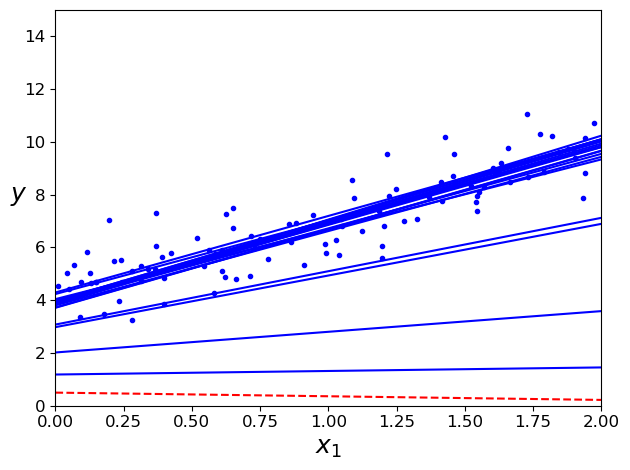

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

Note that the [ravel()](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) function returns a contiguous flattened array.  This function is needed because `y` is a column vector, but the fit() method expects a 1d array.

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

# Mini-Batch Gradient Descent

___Mini-batch gradient descent___ is a combination of the batch and stochastic GD algorithms.  At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. 

The following code implements the Mini-batch GD algorithm:

In [20]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


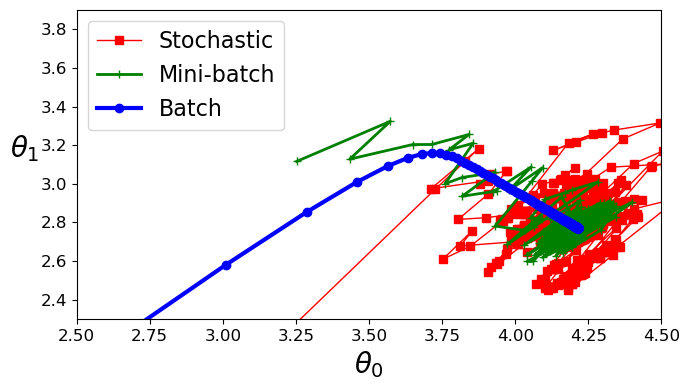

In [22]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Let's summarize the algorithms we’ve discussed so far for Linear Regression.  Note that m is the number of training instances and n is the number of features.

<img src="Figures/LinearRegressionAlgorithms.png " width ="800" />

# Polynomial Regression

We can use ___Polynomial Regression___ to fit nonlinear data with a linear model. This is accomplished by adding powers of each feature as new features, then train a linear model on this extended set of features. What is important to remember is that the model parameters are all first-order - this means the model is linear!

We will generate data from the following equation:

$$ y = 0.5 x^2 + x + 2 + \epsilon $$

We will use the following model to fit this data:

$$ \hat{y} = \hat{\theta}_2 x^2 + \hat{\theta}_1 x + \hat{\theta}_0 $$

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

We will use numpy's [rand()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function to create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).  The [randn()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) function generates an array filled with random floats sampled from a univariate “normal” (i.e. Gaussian) distribution of mean 0 and variance 1.

In [69]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

Saving figure quadratic_data_plot


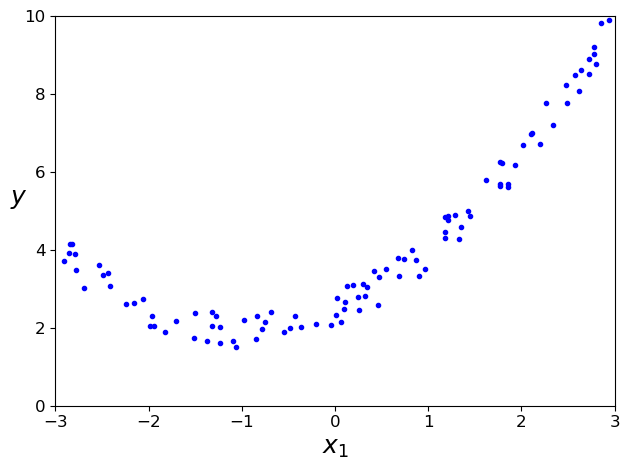

In [34]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.99453666])

In [73]:
X_poly[0]

array([-0.99453666,  0.98910316])

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.56964714]), array([[1.00038156, 0.49300158]]))

Saving figure quadratic_predictions_plot


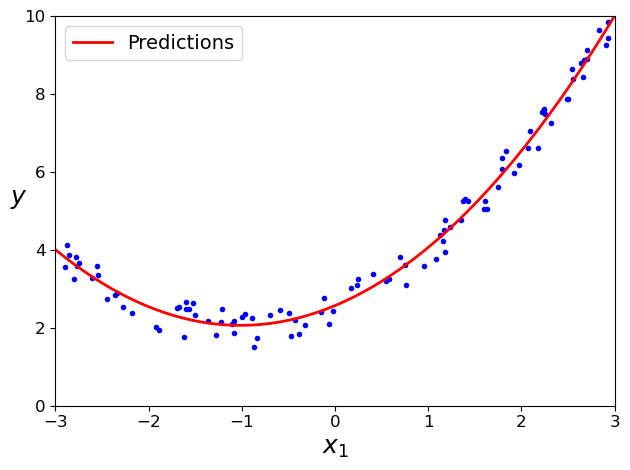

In [75]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

# Learning Curves

___Learning Curves___ are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration)

Saving figure high_degree_polynomials_plot


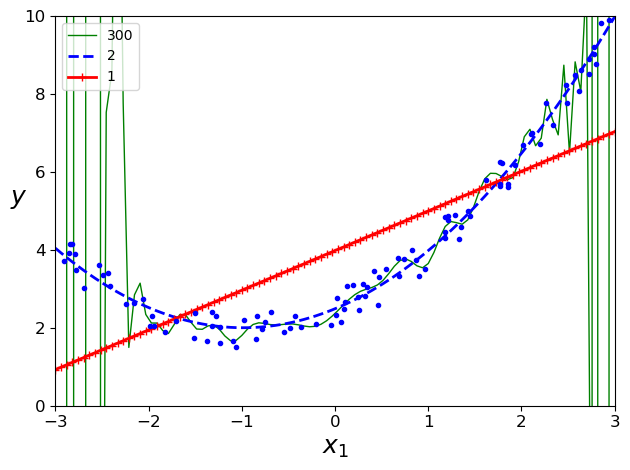

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Let’s look at the learning curves of the plain Linear Regression model:

Saving figure underfitting_learning_curves_plot


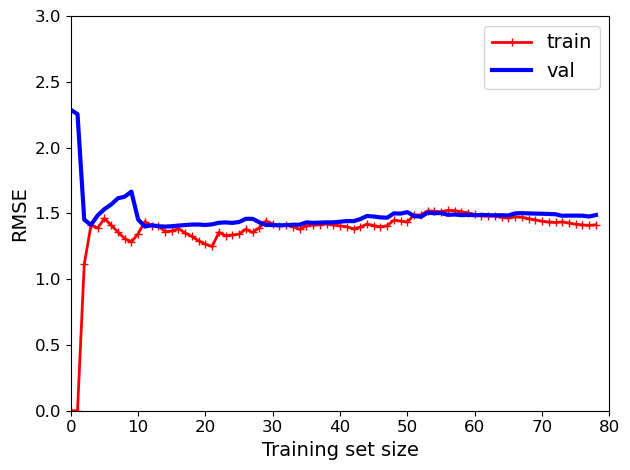

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Let’s look at the learning curves of a 10th-degree polynomial model on the same data:

Saving figure learning_curves_plot


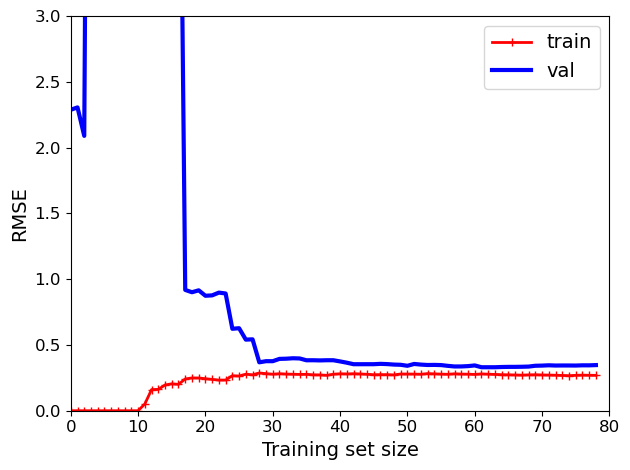

In [46]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# Regularized Models

In order to avoid overfitting the training data, you may want to ___regularize___ your model, that is, constrain it.  A model with fewer degrees of freedom is less able to overfit the data.  For polynomial models, simply reduce the degree of the polynomial.

For linear models, regularization achieved by constraining the weights of the model - three methods are:

 1. ___Ridge Regression___
 2. ___Lasso Regression___
 3. ___Elastic Net___

In [48]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + 2 + np.random.rand(m,1)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

## Ridge Regression

When the method of least squares is applied to nonorthoginal data (i.e. there is some correlation among features), very poor estimates of the regression coefficients can be obtained.  The variance of the least-squares estimates of the regression coefficients may be quite large.  This can cause the absolute value of the least-squares estimates to be very large and very unstable.  This means that their magnitudes and signs may change considerably given a different data sample.

___Ridge Regression___ aims at fixing this problem by constraining the model parameter values through the use of a regularization term in the cost function.

The cost function for simple multiple linear regression is given by:

$$ MSE(\boldsymbol{\theta}) = \frac{1}{m} \sum^m_{i=1} (\boldsymbol{\theta}^T \bf{x}^{(i)} - y^{(i)})^2 $$

The cost function, $ J(\boldsymbol{\theta}) $ for Ridge regression is given by:

$$ J(\boldsymbol{\theta}) = \frac{1}{m} \sum^m_{i=1} (\boldsymbol{\theta}^T \bf{x}^{(i)} - y^{(i)})^2 + \alpha \frac{1}{2} \sum^n_{i=1} \boldsymbol{\theta}^2_i$$

$$ J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + \alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i$$

Saving figure ridge_regression_plot


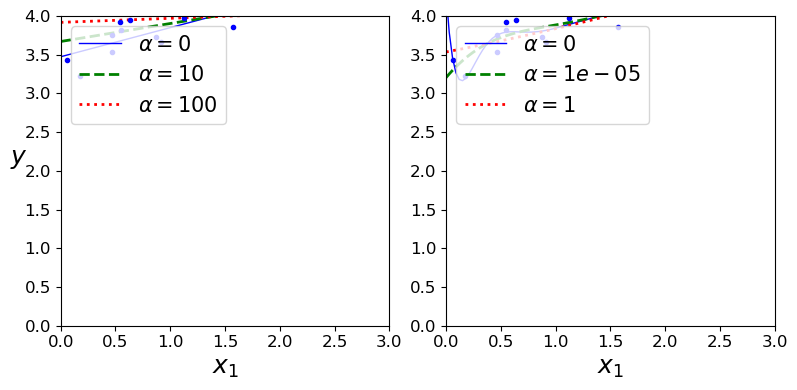

In [49]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Ridge regression can be performed using a closed-form equation, or by gradient descent.  Below is the closed-form equation to solve for the model parameters, $\hat{\mathbf{\theta}}$:

<img src="Figures/RidgeRegressionParameters.png " width ="200" />

The below code shows how to perform Ridge regression with Scikit-Learn using the closed-form solution:

In [54]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky', random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.03470631]])

The below code shows how to perform Ridge regression using stochastic gradient descent.  The first cell employs the 'sag' solver, which stands for Stochastic Average Gradient Descent.

In [55]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.03398202]])

In [57]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.92496194])

## Lasso Regression

___Lasso Regression___ is very similar to Ridge regression, but Lasso adds a regularization term that comes from the L1 norm of the weight vector, rather than the L2 norm.

The cost function, $ J(\boldsymbol{\theta}) $ for Lasso regression is given by:

$$ J(\boldsymbol{\theta}) = \frac{1}{m} \sum^m_{i=1} (\boldsymbol{\theta}^T \bf{x}^{(i)} - y^{(i)})^2 + \alpha \sum^n_{i=1} |\boldsymbol{\theta}|_i$$

$$ J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + \alpha \sum^n_{i=1} |\theta_i| $$

C:\Users\kerry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e-01, tolerance: 2.755e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


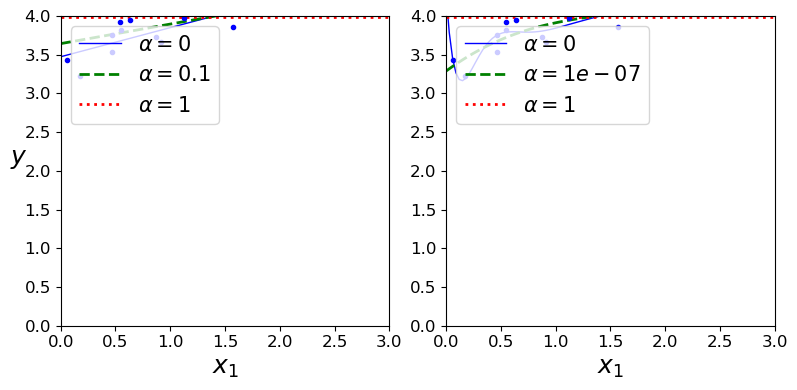

In [58]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

We can get a sense of why Lasso Regression tends to eliminate the weights of the least important features by looking at the following figure:

Saving figure lasso_vs_ridge_plot


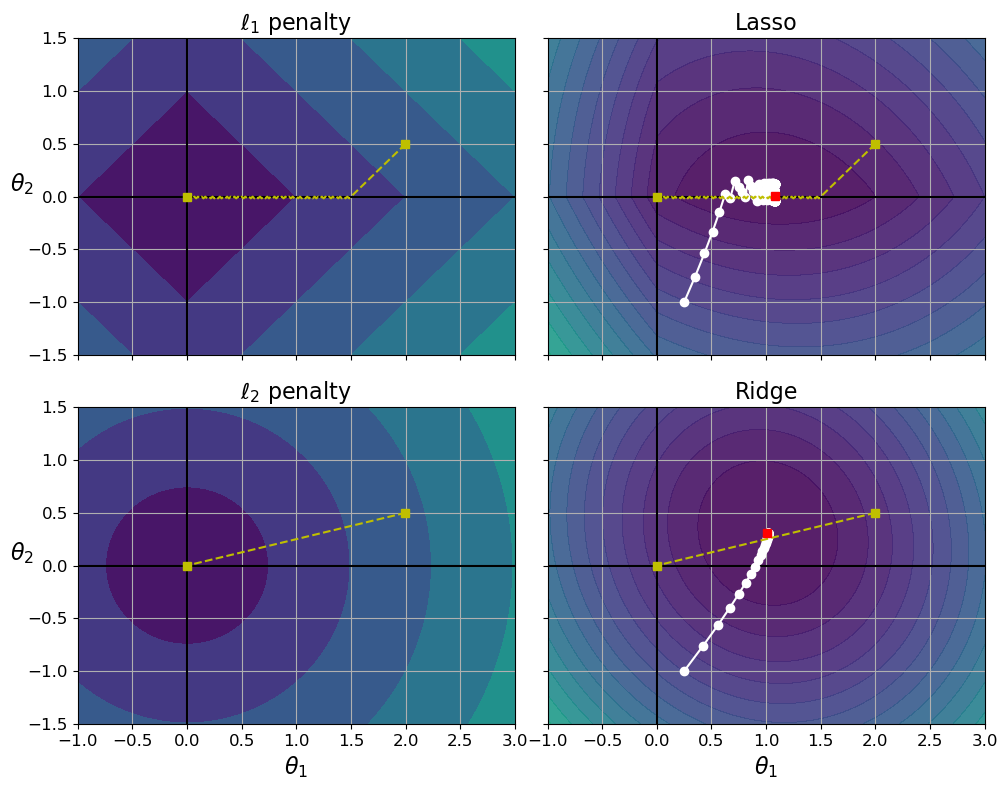

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

# -------------------------------------------------------

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

Here is a small Scikit-Learn example using the Lasso class:

In [62]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.02180523])

## Elastic Net

Elastic Net employs a regularization term that is a combination of the regularization terms of both Ridge and Lasso regression.  The balance between these terms is controlled by a parameter, r.

The cost function, $ J(\boldsymbol{\theta}) $ for Elastic Net regression is given by:

$$ J(\boldsymbol{\theta}) = \frac{1}{m} \sum^m_{i=1} (\boldsymbol{\theta}^T \bf{x}^{(i)} - y^{(i)})^2 + r \alpha \sum^n_{i=1} |\boldsymbol{\theta}|_i + \frac{1-r}{2} \alpha \sum^n_{i=1} \theta_i^2 $$

$$ J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + r \alpha \sum^n_{i=1} |\theta_i| + \frac{1-r}{2} \alpha \sum^n_{i=1} \theta_i^2 $$

Here is a short example that uses Scikit-Learn’s ElasticNet (where the l1_ratio parameter corresponds to the mix ratio r):

In [64]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.02732399])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called ___early stopping___.

Let's generate some data to use for an early stopping example:

In [65]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

The following code implements an early stopping algorithm:

In [66]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Create a graph illustrating RSME as a function of epochs:

Saving figure early_stopping_plot


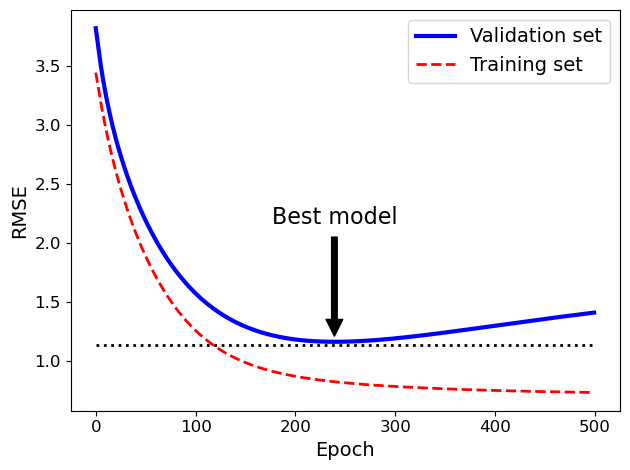

In [67]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [68]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

# Logistic Regression

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
print(iris.DESCR)

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

**Note**: To be future-proof we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

The figure in the book actually is actually a bit fancier:

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

## Softmax Regression

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])